# Zomato analysis and eda

In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
df = pd.read_csv('zomato.csv',encoding ='Latin-1')

In [11]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [29]:
df.shape

(9551, 21)

In [13]:
df.describe() 

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


# missing values 

In [15]:
df.isnull()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9547,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9548,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9549,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [25]:
[feature for feature in df.columns if df[feature].isnull().sum()>0]

['Cuisines']

<AxesSubplot:>

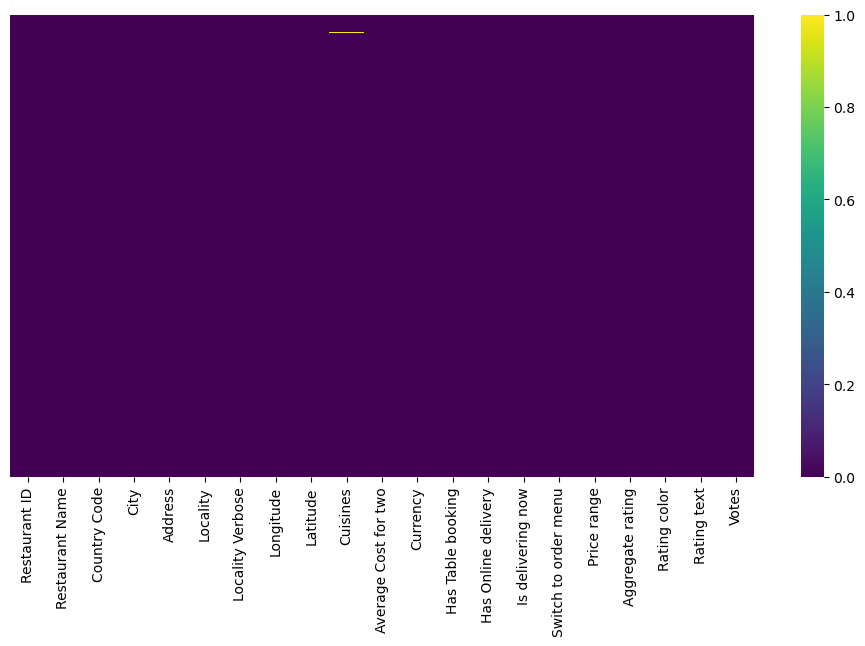

In [82]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [33]:
df_country=pd.read_excel("Country-Code.xlsx")

In [34]:
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


# merginf two tables based on countrycode 



In [36]:
 final_df=pd.merge(df,df_country,on= 'Country Code',how='left')

In [38]:
final_df.Country.value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [50]:
country_name=final_df.Country.value_counts().index
country_name

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

In [46]:
country_value=final_df.Country.value_counts().values
country_value

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

([<matplotlib.patches.Wedge at 0x2d7602b6d00>,
 [Text(-1.052256163793291, 0.3205572737577906, 'India'),
  Text(0.9911329812843455, -0.477132490415823, 'United States'),
  Text(1.0572858296119743, -0.3035567072257165, 'United Kingdom'),
  Text(1.070138816916019, -0.2545641619112621, 'Brazil'),
  Text(1.0793506814479759, -0.21213699926648824, 'UAE'),
  Text(1.086881147244973, -0.16937937230799818, 'South Africa'),
  Text(1.0918635911832035, -0.1335436192729486, 'New Zealand'),
  Text(1.0947903814016446, -0.10692998078388304, 'Turkey'),
  Text(1.096631023945382, -0.08602556201794338, 'Australia'),
  Text(1.0978070729776455, -0.06942355882735218, 'Phillipines'),
  Text(1.0986791544015209, -0.05388984768543213, 'Indonesia'),
  Text(1.0993059848742366, -0.039068550263413035, 'Singapore'),
  Text(1.0997248508282123, -0.02460187941736628, 'Qatar'),
  Text(1.0999533462179636, -0.010130949802716446, 'Sri Lanka'),
  Text(1.0999990477553414, -0.0014473898376707638, 'Canada')])

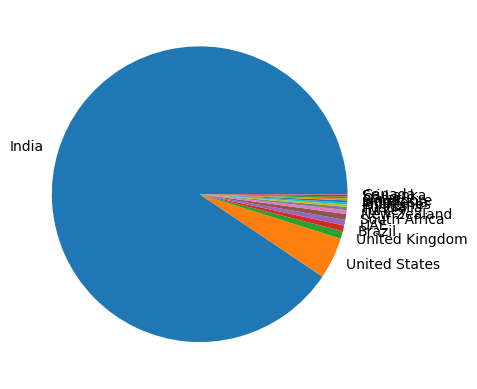

In [51]:
plt.pie(country_value,labels=country_name)

([<matplotlib.patches.Wedge at 0x2d768a94190>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

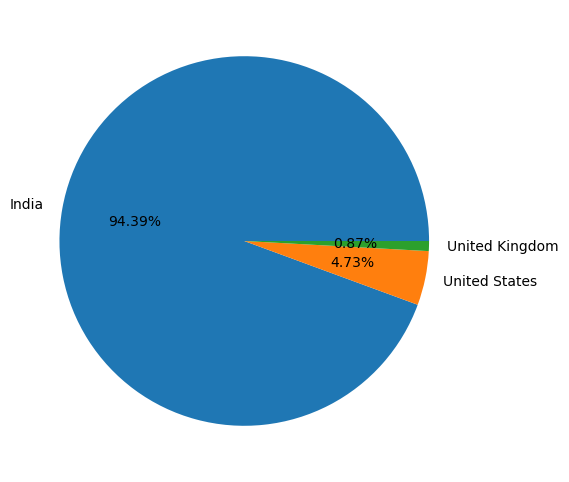

In [83]:
#top 3 
plt.pie(country_value[:3],labels=country_name[:3],autopct='%1.2f%%')


Observation === max trasaction and most popular in india ,top 3 are 


In [64]:
final_df.groupby(['Aggregate rating' ,'Rating color', 'Rating text']).size()

Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

In [66]:
final_df.groupby(['Aggregate rating' ,'Rating color', 'Rating text']).size().reset_index

,Aggregate rating,Rating color,Rating text,0
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [68]:
final_df.groupby(['Aggregate rating' ,'Rating color', 'Rating text']).size().reset_index().rename(columns={0:" rating count"})

,Aggregate rating,Rating color,Rating text,rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [75]:
rating=final_df.groupby(['Aggregate rating' ,'Rating color', 'Rating text']).size().reset_index().rename(columns={0:"rating count"})

# observation
when rating 4.5 to 4.9 ==> excellent 
when rating 4.5 to 4.9 ==> v good 
when rating 4.5 to 4.9 ==> good
when rating 4.5 to 4.9 ==> avg 
when rating 4.5 to 4.9 ==> poor



<AxesSubplot:xlabel='Aggregate rating', ylabel='rating count'>

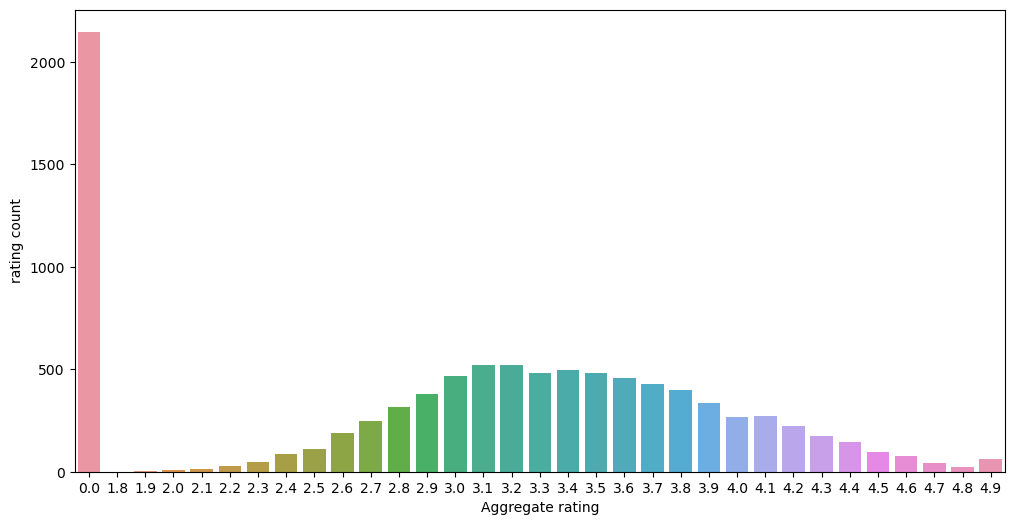

In [81]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6)
sns.barplot(x="Aggregate rating",y="rating count",data=rating)

<AxesSubplot:xlabel='Aggregate rating', ylabel='rating count'>

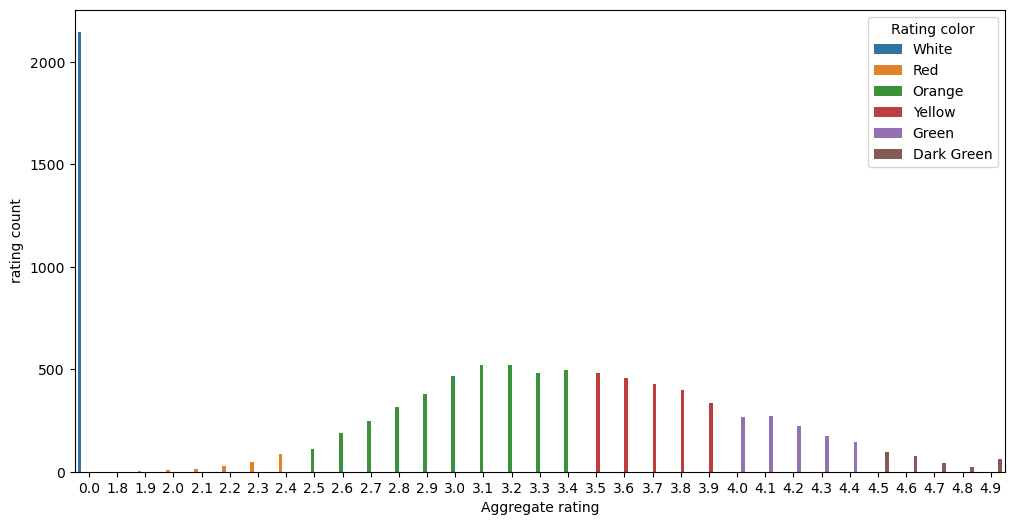

In [84]:
sns.barplot(x="Aggregate rating",y="rating count",hue='Rating color',data=rating)

<AxesSubplot:xlabel='Aggregate rating', ylabel='rating count'>

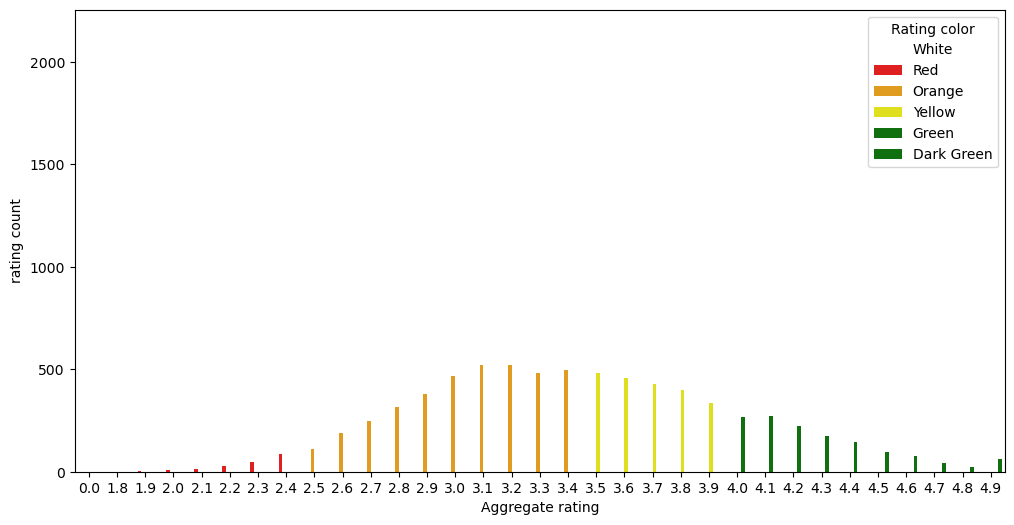

In [103]:
sns.barplot(x="Aggregate rating",y="rating count",hue='Rating color',data=rating,palette=["white",'red','orange','yellow','green','green'])

# observation
mostly btw 2.5 to 4.4
not rated is very high 


<AxesSubplot:xlabel='Rating color', ylabel='count'>

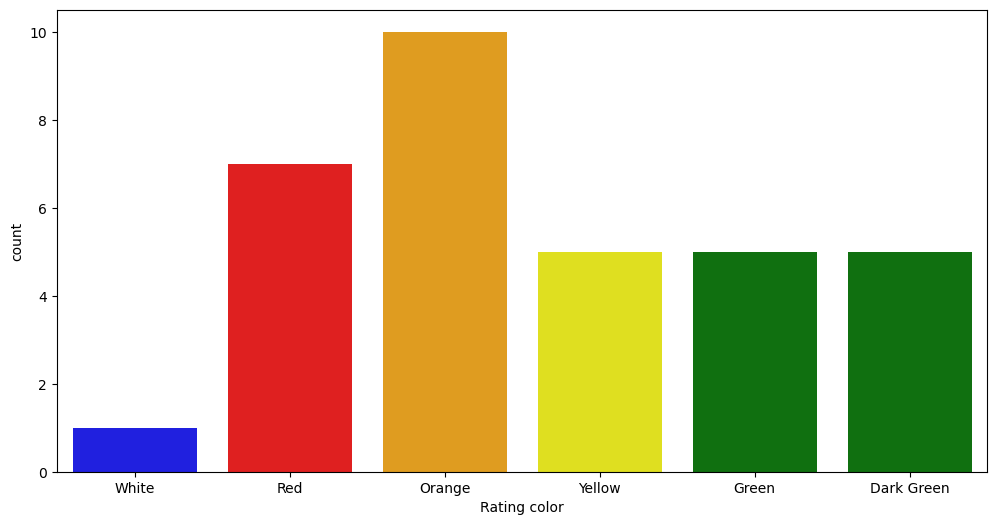

In [106]:
sns.countplot(x="Rating color", data=rating,palette=["blue",'red','orange','yellow','green','green'])

# country with zero rating 


In [107]:
final_df["Rating color"]=="White"

0       False
1       False
2       False
3       False
4       False
        ...  
9546    False
9547    False
9548    False
9549    False
9550    False
Name: Rating color, Length: 9551, dtype: bool

In [108]:
final_df[final_df["Rating color"]=="White"].groupby("Country")

In [113]:
final_df[final_df["Rating color"]=="White"].groupby("Country").size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


max rating 0 from india 

In [117]:
final_df[['Country','Currency']].value_counts()

Country         Currency              
India           Indian Rupees(Rs.)        8652
United States   Dollar($)                  434
United Kingdom  Pounds(£)                  80
Brazil          Brazilian Real(R$)          60
South Africa    Rand(R)                     60
UAE             Emirati Diram(AED)          60
New Zealand     NewZealand($)               40
Turkey          Turkish Lira(TL)            34
Australia       Dollar($)                   24
Phillipines     Botswana Pula(P)            22
Indonesia       Indonesian Rupiah(IDR)      21
Qatar           Qatari Rial(QR)             20
Singapore       Dollar($)                   20
Sri Lanka       Sri Lankan Rupee(LKR)       20
Canada          Dollar($)                    4
dtype: int64

In [122]:
final_df[['Country','Currency']].groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [130]:
final_df[final_df["Has Online delivery"]=="Yes"].groupby("Country").size().reset_index()


,Country,0
0,India,2423
1,UAE,28


In [132]:
final_df[final_df["Has Online delivery"]=="Yes"].Country

565       UAE
566       UAE
571       UAE
572       UAE
573       UAE
        ...  
9166    India
9168    India
9170    India
9171    India
9194    India
Name: Country, Length: 2451, dtype: object

In [133]:
final_df[final_df["Has Online delivery"]=="Yes"].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

In [134]:
final_df[['Country','Has Online delivery']].groupby(['Country','Has Online delivery']).size().reset_index()

,Country,Has Online delivery,0
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


In [136]:
cn=final_df.City.value_counts().index
cv=final_df.City.value_counts().values

([<matplotlib.patches.Wedge at 0x2d76c27e6a0>,
 [Text(-0.6041184274954416, 0.9192610758432204, 'New Delhi'),
  Text(0.034815375370853566, -1.0994489026952488, 'Gurgaon'),
  Text(0.8589153557618371, -0.6872149675585632, 'Noida'),
  Text(1.087417404265874, -0.16590174471556665, 'Faridabad'),
  Text(1.0989896607468026, -0.04713518400969513, 'Ghaziabad'),
  Text(1.0996624470627976, -0.027248899424747827, 'Bhubaneshwar'),
  Text(1.099962491482648, -0.009083905068075139, 'Amritsar')],
 [Text(-0.3295191422702409, 0.5014151322781202, '68.5066938%'),
  Text(0.01899020474773831, -0.5996994014701357, '13.9942423%'),
  Text(0.468499284961002, -0.37484452775921623, '13.5185882%'),
  Text(0.5931367659632039, -0.09049186075394543, '3.1418201%'),
  Text(0.5994489058618923, -0.025710100368924613, '0.3129303%'),
  Text(0.5998158802160714, -0.014863036049862449, '0.2628614%'),
  Text(0.599979540808717, -0.004954857309859166, '0.2628614%')])

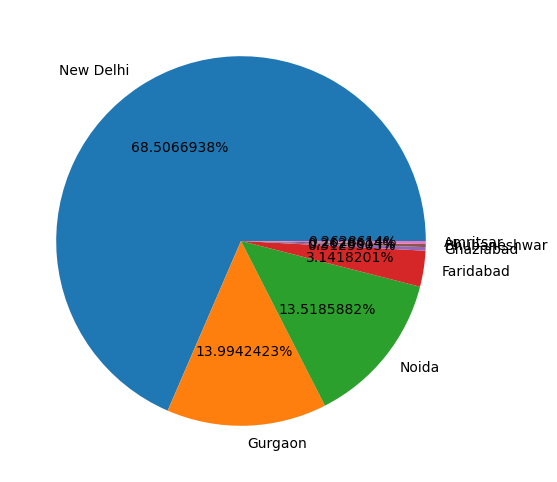

In [147]:
plt.pie(cv[:7],labels=cn[0:7],autopct="%1.7f%%")

In [154]:
final_df['Cuisines'].value_counts().nlargest(10)

North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: Cuisines, dtype: int64

In [161]:
df['Cuisines'].value_counts().head(10)

North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: Cuisines, dtype: int64

In [164]:
df.groupby(["Cuisines"]).size().reset_index()

,Cuisines,0
0,Afghani,4
1,"Afghani, Mughlai, Chinese",1
2,"Afghani, North Indian",1
3,"Afghani, North Indian, Pakistani, Arabian",1
4,African,1
...,...,...
1820,"Western, Asian, Cafe",1
1821,"Western, Fusion, Fast Food",1
1822,World Cuisine,1
1823,"World Cuisine, Mexican, Italian",1


In [165]:
final_df['Cuisines'].value_counts(sort=True, ascending=False)[:10]

North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: Cuisines, dtype: int64